 Tenemos un filto de cafe cayendo en caida libre, podemos modelar el problema partiendo de la segunda ley de Newton y considerando un coeficiente de fricción C
 
\begin{equation}
F=ma=m\frac{dv}{dt}
\end{equation}

\begin{equation}
\frac{dv}{dt}=\frac{F}{m}
\end{equation}

\begin{equation}
\frac{dv}{dt}=\frac{Fg+Fa}{m}
\end{equation}

\begin{equation}
Fa=cv
\end{equation}

\begin{equation}
\frac{dv}{dt}=\frac{-mg+cv}{m}
\end{equation}

Ecuación diferencial
\begin{equation}
\frac{dv}{dt}=-g+\frac{cv(t)}{m}
\end{equation}

Para hallar la solución analitíca usamos la sustitución:
 
\begin{equation}
u=-g+\frac{cv(t)}{m}
\end{equation} 

\begin{equation}
du=\frac{c}{m}dv
\end{equation} 
 
\begin{equation}
\int \frac{du}{u}=\int \frac{c}{m}dt
\end{equation} 


\begin{equation}
ln(u)=\frac{c}{m}t+c1
\end{equation} 

\begin{equation}
u=e^{\frac{c}{m}t+c1}
\end{equation} 

\begin{equation}
-g+\frac{c}{m}v=e^{\frac{c}{m}t+c1}
\end{equation} 
 

finalmente la velocidad analítica es: 
\begin{equation}
v(t)=\frac{mg}{c}(1-e^{\frac{ct}{m}})
\end{equation}



Ahora leeremos los datos del archivo fallin que contiene los datos de un filtro de café que cae libremente 
e incluye la fricción con el aire. En la primer columna aparece el tiempo y en la segunda la posición.

In [1]:
from numpy import loadtxt, shape, exp
from matplotlib.pyplot import plot as plt
from pylab import plot, show, grid, xlabel, ylabel, xlim, ylim

In [2]:
data = loadtxt('../parcial/falling.txt', comments="//")

Ahora graficamos las posiciones en funcion del tiempo

<function matplotlib.pyplot.show(*args, **kw)>

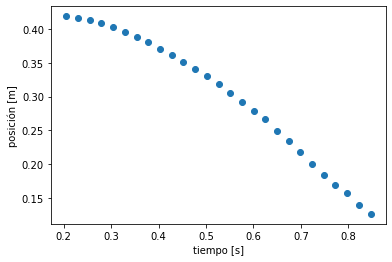

In [3]:
plt(data[:,0], data[:,1], 'o')
xlabel("tiempo [s]")
ylabel("posición [m]")
show

Ahora calculamos la derivada numérica que fisicamente representa la velocidad de caida del objeto, para ello usamos cada uno de los métodos vistos en clase y posteriormente graficamos estos datos en función del tiempo

In [ ]:
from pylab import plot, legend, grid
from math import exp
    

vel1=[]
time1=[]
 
#El dt no es fijo sino que varía entre cada intervalo de posiciones, asi que se define en cada ciclo partiendo de los datos.
    
for t in range (1,27):
    
    v1=(data[t,1]-data[t-1,1])/(data[t,0]-data[t-1,0]) #  método de diferencias finitas hacia atras
    vel1.append(v1)                     
    time1.append(data[t,0])
    


vel2=[]
time2=[]

for t in range (1,26):
    
    v2=(data[t+1,1]-data[t-1,1])/(2*(data[t,0]-data[t-1,0]))# método de diferencias finitas centrado
    vel2.append(v2)
    time2.append(data[t,0])
    
    

vel3=[]
time3=[]

for t in range (1,26):
    
    v3=(data[t+1,1]-data[t,1])/(data[t+1,0]-data[t,0])#  método de diferencias finitas hacia adelante
    vel3.append(v3)
    time3.append(data[t,0])
    
vana=[]
time=[]
k=0.051
g=9.8
    
for t in range (0,15):
    v=k*g*(1-exp((19.6)*data[t,0]))
    vana.append(v)
    time.append(data[t,0])

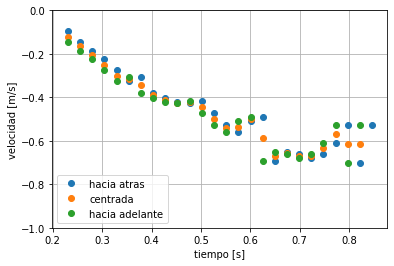

In [7]:
plot (time1,vel1 ,'o', label='hacia atras')
plot (time2,vel2,'o', label='centrada')
plot (time3,vel3,'o', label='hacia adelante')
legend(loc='lower left')
grid ('on')
ylim(-1,0)
xlabel("tiempo [s]")
ylabel("velocidad [m/s]")
show()

Como se observa en la  grafica anterior la velocidad tiende a caer para luego estabilizarce en un punto entre [-0.5, -0.7] 
sin embargo, en este intervalo los datos son muy dispersos para determinar con precision cual es la velocidad terminal.

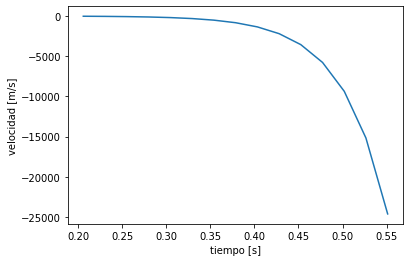

In [33]:
plot (time,vana, label='analítica')
xlabel("tiempo [s]")
ylabel("velocidad [m/s]")
show()

La  anterior grafica representa la veocidad analitica en el intervalo de tiempo en el que trasncurre la caida para 
los datos experimentales, sin embargo se observa que no existe correspondencia entre esta grafica y la realizada mediante los datos numericos, esto posiblemente se deaba a que el modelo fisico planteado no sea el adecuado ya que la expresion para la velocidad no tiene en cuenta restricciones y por lo  tanto la funcion explota. 
 Por otra parte la discrepancia entre ambas graficas se puede deber al hecho de que para calcular la constante c/m useamos datos numericos 

Ahora calcularemos la aceleracion partiendo de los datos obtenidos para las velocidades, de nuevo usando el metodo de diferencia finitas centrado.

<function matplotlib.pyplot.show(*args, **kw)>

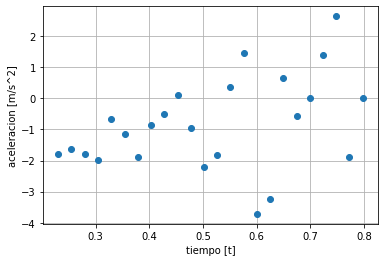

In [9]:
ace=[]
timea=[]
    
for t in range (1,25):
    
    a=(vel1[t+1]-vel1[t-1])/(2*(data[t,0]-data[t-1,0]))
    ace.append(a)
    timea.append (data[t,0])
    
plot (timea,ace, 'o')
xlabel("tiempo [t]")
ylabel("aceleracion [m/s^2]") 
grid ('on')
show

La aceleración del objeto debería tender a ser cero en la gráfica anterior. Sin embargo, este comportamiente no se observa quizá debido a la dispersión de los datos o también puede deberse a que no se hallan tomado muestras en un intervalo temporal suficientemente grande para garantizar que se alcanzó la velocidad terminal y esta no logre apreciarse en los datos, sin embargo podemos observar en que momento esta aceleracion se hace cero al rededor del intervalo de 0.5 a 0.7 segundos

analizaremos el error asociado a cada uno de los parametros que se han tenido en cuenta durante los calculos:
Los cálculos de la velocidad hallados con el método de diferencias finitas poseen un error proporcional al tamaño del dt en el caso de diferencias finitas hacia atrás y hacia adelante el error es de 0.0247 y con el metodo centrado el error es proporcional al cuadrado del dt es decir de 0.00061009 :

In [16]:
dt= (data[1,0]-data[0,0])
print (dt)
print(dt**2)

0.0247
0.00061009


Para la velocidad analitica el error asocido se calcula teniendo en cuenta la derivada de la funcion analitica, por un dt:
    
\begin{equation}
\frac{dv}{dt}=-ge^{\frac{c}{m}t}dt
\end{equation}
    
 Donde el dt es el paso en el que se calculan los datos que se corresponde con el valor de 0.0247
 
 
Para hallar el valor de c/m  observamos en la grafica de la aceleracion contra tiempo el punto en el que esta se hace aproximadamente cero y por lo tanto la velocidad sería una constante, como los datos son muy dispersos es posible que exista un margen de error considerable, el valor oscila entre el tiempo 0.5 y 0.7 segundos, ahora observamos en la grafica de velocidad contra tiempo el valor de la velocidad a partir de este intervalo y encontramos que es aproximadamente 0.5 m/s entonces


\begin{equation}
a=-g+\frac{c}{m}v=0
\end{equation}

\begin{equation}
\frac{c}{m}=\frac{g}{v}
\end{equation}

\begin{equation}
\frac{c}{m}=0.051
\end{equation}

     